# Project 5: Communicate Data Findings


# Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#gath">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#eda">Data Analysis</a></li>
</ul>

## Bay Wheels Bike Sharing System Usage Pattern 2019

### Investigation Overview
In this investigation, I wanted to look at the data of Ford GoBike System that could be used to predict their users behaviour. The main focus was on the four time(hour/day/month) of starting time of the ride, user type and duration.

In [314]:
import datetime
import calendar
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pandas.api.types import CategoricalDtype


%matplotlib inline
import seaborn as sns


<a name = 'gath'></a>
# Gathering Data

In [2]:
path = r'/Users/ahmedeldably/Downloads/CODE University of Applied Sciences/Data Science/Udacity Data Analysis Nanodeegree/Project 5'

files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in files), ignore_index = True)

df.to_csv('fordgo_bike_master.csv', index = False)

/Users/ahmedeldably/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/Users/ahmedeldably/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  """
/Users/ahmedeldably/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  """


<a name = 'assess'></a>
# Assessing Data:

In [3]:
df = pd.read_csv("fordgo_bike_master.csv")
df

/Users/ahmedeldably/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (13,14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.7100,2019-10-01 04:42:25.8640,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.3530,2019-10-01 02:16:51.9820,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.9980,2019-10-01 00:46:01.9590,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.6630,2019-10-01 00:22:16.8490,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.6530,2019-10-01 00:14:41.0740,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506978,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,No,NaN
2506979,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,No,NaN
2506980,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,Yes,NaN
2506981,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,No,NaN


In [4]:
df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506983 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2506983 non-null  int64  
 1   start_time               2506983 non-null  object 
 2   end_time                 2506983 non-null  object 
 3   start_station_id         2426249 non-null  float64
 4   start_station_name       2426850 non-null  object 
 5   start_station_latitude   2506983 non-null  float64
 6   start_station_longitude  2506983 non-null  float64
 7   end_station_id           2424081 non-null  float64
 8   end_station_name         2424633 non-null  object 
 9   end_station_latitude     2506983 non-null  float64
 10  end_station_longitude    2506983 non-null  float64
 11  bike_id                  2506983 non-null  int64  
 12  user_type                2506983 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

In [5]:
df['user_type'].unique()

array(['Customer', 'Subscriber'], dtype=object)

In [6]:
df["bike_share_for_all_trip"].unique()

array(['No', 'Yes', nan], dtype=object)

In [7]:
df.shape

(2506983, 15)

In [8]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,2.506983e+06,2.426249e+06,2.506983e+06,2.506983e+06,2.424081e+06,2.506983e+06,2.506983e+06,2.506983e+06
mean,8.076483e+02,1.465047e+02,3.776506e+01,-1.223499e+02,1.427044e+02,3.776422e+01,-1.223459e+02,2.789833e+04
std,1.974714e+03,1.223171e+02,1.363698e-01,3.089648e-01,1.214296e+02,2.392885e-01,7.080417e-01,1.146067e+05
min,6.000000e+01,3.000000e+00,0.000000e+00,-1.225143e+02,3.000000e+00,0.000000e+00,-1.225143e+02,4.000000e+00
25%,3.590000e+02,4.700000e+01,3.776931e+01,-1.224130e+02,4.300000e+01,3.777003e+01,-1.224117e+02,1.952000e+03
50%,5.710000e+02,1.050000e+02,3.778053e+01,-1.223983e+02,1.010000e+02,3.778076e+01,-1.223981e+02,4.420000e+03
75%,8.870000e+02,2.430000e+02,3.779539e+01,-1.222914e+02,2.390000e+02,3.779587e+01,-1.222934e+02,9.682000e+03
max,9.121100e+05,4.980000e+02,4.551000e+01,0.000000e+00,4.980000e+02,4.551000e+01,0.000000e+00,9.999410e+05


In [9]:
# Checking for duplicates
df.duplicated().sum()

0

In [10]:
# Checking for null values
df.isna().sum()

duration_sec                     0
start_time                       0
end_time                         0
start_station_id             80734
start_station_name           80133
start_station_latitude           0
start_station_longitude          0
end_station_id               82902
end_station_name             82350
end_station_latitude             0
end_station_longitude            0
bike_id                          0
user_type                        0
bike_share_for_all_trip     243259
rental_access_method       2386145
dtype: int64

Some values of `start_station_id`, `start_station_name`, `end_station_id`, `end_station_name`,`bike_share_for_all_trip` and `rental_access_method` are null

In [11]:
df['start_station_name'].unique()

array(['San Francisco Caltrain Station (King St at 4th St)',
       'Pierce Ave at Market St', 'Jones St at Post St',
       '17th St at Valencia St', 'Sanchez St at 15th St',
       'Davis St at Jackson St',
       'San Francisco Ferry Building (Harry Bridges Plaza)',
       '5th St at Folsom', 'Steuart St at Market St',
       'Gennessee St at Monterey Blvd', 'Fulton St at Ashby Ave',
       'S Van Ness Ave at Market St', 'Fulton St at Bancroft Way',
       'West St at 40th St', 'Market St at 45th St',
       '19th Street BART Station', 'Haste St at Telegraph Ave',
       'Howard St at 8th St', 'Commercial St at Montgomery St',
       'Woolsey St at Sacramento St', 'Jackson Playground',
       '16th St at Prosper St', '1st St at Folsom St',
       'Townsend St at 7th St', 'China Basin St at 3rd St',
       'Powell St BART Station (Market St at 4th St)',
       'Market St at Franklin St', '55th St at Telegraph Ave',
       'Rhode Island St at 17th St', 'Clay St at Battery St',
       

In [12]:
df["rental_access_method"].unique()

array([nan, 'app', 'clipper'], dtype=object)

<a name = 'cleaning'></a>
# Cleaning Data:

In [13]:
# Making a copy of the data before starting
df_cleaned = df.copy()

<b>Define:</b> 
Dropping null values from `bike_share_for_all_trip` column

<b>Code:</b>

In [14]:
df_cleaned = df_cleaned[df_cleaned['bike_share_for_all_trip'].notna()]


<b>Test:</b>

In [15]:
df_cleaned['bike_share_for_all_trip'].unique()

array(['No', 'Yes'], dtype=object)

In [16]:
df_cleaned.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2263724 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2263724 non-null  int64  
 1   start_time               2263724 non-null  object 
 2   end_time                 2263724 non-null  object 
 3   start_station_id         2262979 non-null  float64
 4   start_station_name       2262979 non-null  object 
 5   start_station_latitude   2263724 non-null  float64
 6   start_station_longitude  2263724 non-null  float64
 7   end_station_id           2262979 non-null  float64
 8   end_station_name         2262979 non-null  object 
 9   end_station_latitude     2263724 non-null  float64
 10  end_station_longitude    2263724 non-null  float64
 11  bike_id                  2263724 non-null  int64  
 12  user_type                2263724 non-null  object 
 13  bike_share_for_all_trip  2263724 non-null 

<b>Define:</b>

Dropping rows which has null values for the `start_station_id` column

<b>Code:</b>

In [17]:
df_cleaned = df_cleaned[df_cleaned['start_station_id'].notna()]

<b>Test:</b>

In [18]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   duration_sec             2262979 non-null  int64  
 1   start_time               2262979 non-null  object 
 2   end_time                 2262979 non-null  object 
 3   start_station_id         2262979 non-null  float64
 4   start_station_name       2262979 non-null  object 
 5   start_station_latitude   2262979 non-null  float64
 6   start_station_longitude  2262979 non-null  float64
 7   end_station_id           2262979 non-null  float64
 8   end_station_name         2262979 non-null  object 
 9   end_station_latitude     2262979 non-null  float64
 10  end_station_longitude    2262979 non-null  float64
 11  bike_id                  2262979 non-null  int64  
 12  user_type                2262979 non-null  object 
 13  bike_share_for_all_trip  2262979 non-null 

<b>Define:</b>

Converting some columns to the appropriate data type:

Starting and ending times' columns to timestamp.

`user_type` and `bike_share_for_all_trip` to category.

`bike_id`, `start_station_id`, and `end_station_id` to object.

<b>Code:</b>

In [343]:
df_cleaned["start_time"] = pd.to_datetime(df_cleaned['start_time'])
df_cleaned["end_time"] = pd.to_datetime(df_cleaned['end_time'])

In [344]:
df_cleaned['user_type'] = df_cleaned['user_type'].astype('category')
df_cleaned['bike_share_for_all_trip'] = df_cleaned['bike_share_for_all_trip'].astype('category')

In [345]:
df_cleaned['bike_id'] = df_cleaned['bike_id'].astype('str')
df_cleaned['start_station_id'] = df_cleaned['start_station_id'] .astype('str')
df_cleaned['end_station_id'] = df_cleaned['end_station_id'] .astype('str')

<b>Test:</b>

In [22]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration_sec             2262979 non-null  int64         
 1   start_time               2262979 non-null  datetime64[ns]
 2   end_time                 2262979 non-null  datetime64[ns]
 3   start_station_id         2262979 non-null  object        
 4   start_station_name       2262979 non-null  object        
 5   start_station_latitude   2262979 non-null  float64       
 6   start_station_longitude  2262979 non-null  float64       
 7   end_station_id           2262979 non-null  object        
 8   end_station_name         2262979 non-null  object        
 9   end_station_latitude     2262979 non-null  float64       
 10  end_station_longitude    2262979 non-null  float64       
 11  bike_id                  2262979 non-null  object        
 12  

In [23]:
df_cleaned["start_time"].dt.year.unique()

array([2019])

In [24]:
df_cleaned["end_time"].dt.year.unique()

array([2019])

In [25]:
df_cleaned.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude
count,2.262979e+06,2.262979e+06,2.262979e+06,2.262979e+06,2.262979e+06
mean,8.069304e+02,3.776979e+01,-1.223549e+02,3.776918e+01,-1.223516e+02
std,1.922206e+03,1.030237e-01,1.626585e-01,2.005436e-01,5.807114e-01
min,6.100000e+01,0.000000e+00,-1.224952e+02,0.000000e+00,-1.224952e+02
25%,3.580000e+02,3.777008e+01,-1.224130e+02,3.777041e+01,-1.224117e+02
50%,5.690000e+02,3.778053e+01,-1.223984e+02,3.778079e+01,-1.223981e+02
75%,8.840000e+02,3.779539e+01,-1.222948e+02,3.779639e+01,-1.222948e+02
max,8.621700e+04,4.551000e+01,0.000000e+00,4.551000e+01,0.000000e+00


In [26]:
df_cleaned.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,rental_access_method
0,60863,2019-09-30 11:48:02.710,2019-10-01 04:42:25.864,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,465.0,San Francisco Caltrain Station (King St at 4th...,37.776329,-122.394438,12904,Customer,No,NaN
1,36019,2019-09-30 16:16:32.353,2019-10-01 02:16:51.982,294.0,Pierce Ave at Market St,37.327581,-121.884559,443.0,3rd St at Keyes St,37.320866,-121.876279,163,Customer,No,NaN
2,5615,2019-09-30 23:12:25.998,2019-10-01 00:46:01.959,370.0,Jones St at Post St,37.787327,-122.413278,4.0,Cyril Magnin St at Ellis St,37.785881,-122.408915,10737,Customer,No,NaN
3,1482,2019-09-30 23:57:34.663,2019-10-01 00:22:16.849,109.0,17th St at Valencia St,37.763316,-122.421904,460.0,Terry Francois Blvd at Warriors Way,37.769095,-122.386333,10346,Customer,No,NaN
4,1272,2019-09-30 23:53:28.653,2019-10-01 00:14:41.074,95.0,Sanchez St at 15th St,37.766219,-122.431060,127.0,Valencia St at 21st St,37.756708,-122.421025,1349,Subscriber,No,NaN


<b>Define:</b>
Convert duration in seconds to minutes

<b>Code:</b>

In [27]:
df_cleaned["duration_sec"] =  df_cleaned["duration_sec"] / 60

<b>Test</b>

In [28]:
df_cleaned["duration_sec"]

0          1014.383333
1           600.316667
2            93.583333
3            24.700000
4            21.200000
              ...     
2506978       8.000000
2506979       5.216667
2506980       2.350000
2506981       2.316667
2506982       4.516667
Name: duration_sec, Length: 2262979, dtype: float64

In [29]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration_sec             float64       
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  rental_access_method     object        
dtypes: category(2), datetime64[ns](2), float64(5), object(6)
memory usage: 246.0+ MB


<b>Define:</b>

Changing duration_sec name to duration. 

<b>Code:</b>

In [30]:
# Renaming the column using .rename method
df_cleaned.rename(columns = {'duration_sec':'duration'}, inplace = True)

<b>Test:</b>

In [21]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 16 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   duration                 float64
 1   start_time               object 
 2   end_time                 object 
 3   start_station_id         float64
 4   start_station_name       object 
 5   start_station_latitude   float64
 6   start_station_longitude  float64
 7   end_station_id           float64
 8   end_station_name         object 
 9   end_station_latitude     float64
 10  end_station_longitude    float64
 11  bike_id                  int64  
 12  user_type                object 
 13  bike_share_for_all_trip  object 
 14  distance                 float64
 15  month                    object 
dtypes: float64(8), int64(1), object(7)
memory usage: 269.5+ MB


<b>Define:</b>

Converting `duration` to int

<b>Code:</b>

In [23]:
df_cleaned["duration"] = df_cleaned["duration"].astype(int)

<b>Test:</b>

<b>Define:</b>

Creating two columns, one for the day and other for hour of the week.

In [269]:
df_cleaned['weekday'] = df_cleaned['start_time'].dt.strftime('%a')

In [301]:
df_cleaned['weekday'].astype('category')

0          Sat
1          Tue
2          Tue
3          Tue
4          Tue
          ... 
2207590    Thu
2207591    Thu
2207592    Thu
2207593    Thu
2207594    Thu
Name: weekday, Length: 2207595, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [327]:
weekdays = ['Mon','Tue','Wed','Thu','Fri', 'Sat', 'Sun']
ordered_weekdays = pd.api.types.CategoricalDtype(ordered = True, categories = weekdays)
df_cleaned['weekday'] = df_cleaned['weekday'].astype(ordered_weekdays)

In [328]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 18 columns):
 #   Column                   Non-Null Count    Dtype   
---  ------                   --------------    -----   
 0   duration                 2207595 non-null  int64   
 1   start_time               2207595 non-null  object  
 2   end_time                 2207595 non-null  object  
 3   start_station_id         2207595 non-null  float64 
 4   start_station_name       2207595 non-null  object  
 5   start_station_latitude   2207595 non-null  float64 
 6   start_station_longitude  2207595 non-null  float64 
 7   end_station_id           2207595 non-null  float64 
 8   end_station_name         2207595 non-null  object  
 9   end_station_latitude     2207595 non-null  float64 
 10  end_station_longitude    2207595 non-null  float64 
 11  bike_id                  2207595 non-null  int64   
 12  user_type                2207595 non-null  object  
 13  bike_share_for_all_trip  22

In [321]:
days_order = pd.CategoricalDtype(weekdays, ordered=True)

In [322]:
df_cleaned['weekday'].astype(days_order)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
          ... 
2207590    NaN
2207591    NaN
2207592    NaN
2207593    NaN
2207594    NaN
Name: weekday, Length: 2207595, dtype: category
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

In [299]:
df_cleaned['weekday'] = df_cleaned['start_time'].dt.strftime('%a')
df_cleaned['hour'] = df_cleaned['start_time'].dt.hour

<b>Test:</b>


In [114]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 18 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   duration                 int64         
 1   start_time               datetime64[ns]
 2   end_time                 datetime64[ns]
 3   start_station_id         object        
 4   start_station_name       object        
 5   start_station_latitude   float64       
 6   start_station_longitude  float64       
 7   end_station_id           object        
 8   end_station_name         object        
 9   end_station_latitude     float64       
 10  end_station_longitude    float64       
 11  bike_id                  object        
 12  user_type                category      
 13  bike_share_for_all_trip  category      
 14  distance                 float64       
 15  month                    object        
 16  weekday                  object        
 17  hour                     in

<b>Define:</b>

Calculating the distance using latitude and longitude

In [33]:
import geopy.distance
def distance_cal(start, end):
    coords_1 = ([start])
    coords_2 = ([end])
    
    return geopy.distance.geodesic(coords_1, coords_2).km
    

In [34]:
df_cleaned['distance'] = df_cleaned.apply(lambda x: distance_cal((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

In [35]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2506982
Data columns (total 16 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration                 2262979 non-null  float64       
 1   start_time               2262979 non-null  datetime64[ns]
 2   end_time                 2262979 non-null  datetime64[ns]
 3   start_station_id         2262979 non-null  object        
 4   start_station_name       2262979 non-null  object        
 5   start_station_latitude   2262979 non-null  float64       
 6   start_station_longitude  2262979 non-null  float64       
 7   end_station_id           2262979 non-null  object        
 8   end_station_name         2262979 non-null  object        
 9   end_station_latitude     2262979 non-null  float64       
 10  end_station_longitude    2262979 non-null  float64       
 11  bike_id                  2262979 non-null  object        
 12  

<b>Define:</b>
Dropping the `rental_access_method` column since we don't have enough data in it and dropping null values from here will result to losing many useful data.

In [36]:
df_cleaned.drop(['rental_access_method'], axis = 1, inplace = True)

<b>Test:</b>

In [40]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2262979 entries, 0 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration                 2262979 non-null  float64       
 1   start_time               2262979 non-null  datetime64[ns]
 2   end_time                 2262979 non-null  datetime64[ns]
 3   start_station_id         2262979 non-null  object        
 4   start_station_name       2262979 non-null  object        
 5   start_station_latitude   2262979 non-null  float64       
 6   start_station_longitude  2262979 non-null  float64       
 7   end_station_id           2262979 non-null  object        
 8   end_station_name         2262979 non-null  object        
 9   end_station_latitude     2262979 non-null  float64       
 10  end_station_longitude    2262979 non-null  float64       
 11  bike_id                  2262979 non-null  object        
 12  

<b>Define:</b>

Dropping distance values which are equal to zero

<b>Code:</b>

In [57]:
df_cleaned = df_cleaned[df_cleaned['distance'] != 0]

<b>Test:</b>

In [60]:
df_cleaned[df_cleaned['distance'] == 0]

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance


In [61]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2207595 entries, 1 to 2506982
Data columns (total 15 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration                 2207595 non-null  float64       
 1   start_time               2207595 non-null  datetime64[ns]
 2   end_time                 2207595 non-null  datetime64[ns]
 3   start_station_id         2207595 non-null  object        
 4   start_station_name       2207595 non-null  object        
 5   start_station_latitude   2207595 non-null  float64       
 6   start_station_longitude  2207595 non-null  float64       
 7   end_station_id           2207595 non-null  object        
 8   end_station_name         2207595 non-null  object        
 9   end_station_latitude     2207595 non-null  float64       
 10  end_station_longitude    2207595 non-null  float64       
 11  bike_id                  2207595 non-null  object        
 12  

<b>Define:</b>

Adding a month column

<b>Code:</b>

In [147]:
df_cleaned['month'] = df_cleaned['start_time'].dt.month
df_cleaned = df_cleaned.sort_values(by = 'month')

In [148]:
df_cleaned

,duration,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,distance,month
1520697,3.566667,2019-01-19 00:36:39.800,2019-01-19 00:40:14.400,53.0,Grove St at Divisadero,37.775946,-122.437777,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5276,Customer,No,0.782230,1
1580744,9.883333,2019-01-08 12:52:08.787,2019-01-08 13:02:02.299,17.0,Embarcadero BART Station (Beale St at Market St),37.792251,-122.397086,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,5452,Subscriber,No,1.744617,1
1580743,4.316667,2019-01-08 12:58:17.597,2019-01-08 13:02:37.102,20.0,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5219,Subscriber,No,0.751405,1
1580742,6.516667,2019-01-08 12:56:26.466,2019-01-08 13:02:57.621,377.0,Fell St at Stanyan St,37.771917,-122.453704,71.0,Broderick St at Oak St,37.773063,-122.439078,1518,Subscriber,No,1.294925,1
1580741,3.900000,2019-01-08 12:59:15.598,2019-01-08 13:03:10.335,58.0,Market St at 10th St,37.776619,-122.417385,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,5035,Subscriber,No,0.701379,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981386,4.700000,2019-11-07 16:20:05.642,2019-11-07 16:24:48.342,341.0,Fountain Alley at S 2nd St,37.336188,-121.889277,280.0,San Fernando St at 7th St,37.337122,-121.883215,2799,Subscriber,No,0.547094,11
1981384,10.233333,2019-11-07 16:14:49.951,2019-11-07 16:25:04.627,445.0,Natoma St at New Montgomery St,37.786553,-122.399607,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,2743,Subscriber,No,1.090430,11
1981355,5.850000,2019-11-07 16:23:25.389,2019-11-07 16:29:17.202,79.0,7th St at Brannan St,37.773492,-122.403673,44.0,Civic Center/UN Plaza BART Station (Market St ...,37.781074,-122.411738,10846,Subscriber,No,1.101392,11
1981413,24.300000,2019-11-07 15:57:29.996,2019-11-07 16:21:48.679,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,102.0,Irwin St at 8th St,37.766883,-122.399579,11058,Customer,No,4.217497,11


In [154]:
df_cleaned['month'] = df_cleaned['month'].apply(lambda x: calendar.month_abbr[x])

<b>Define:</b> 

Dropping unnecessary columns from the dataset (Latitude)  

<b>Code:</b>

In [339]:
df_cleaned.drop(['start_station_latitude', 'start_station_longitude', 'end_station_latitude', 'end_station_longitude'], axis = 1, inplace = True)

KeyError: "['start_station_latitude' 'start_station_longitude' 'end_station_latitude'\n 'end_station_longitude'] not found in axis"

<b>Test:</b>

In [347]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration                 2207595 non-null  int64         
 1   start_time               2207595 non-null  datetime64[ns]
 2   end_time                 2207595 non-null  datetime64[ns]
 3   start_station_id         2207595 non-null  object        
 4   start_station_name       2207595 non-null  object        
 5   end_station_id           2207595 non-null  object        
 6   end_station_name         2207595 non-null  object        
 7   bike_id                  2207595 non-null  object        
 8   user_type                2207595 non-null  category      
 9   bike_share_for_all_trip  2207595 non-null  category      
 10  distance                 2207595 non-null  float64       
 11  month                    2207595 non-null  object        
 12  

<a name = 'store'></a>
# Storing Data

In [115]:
df_cleaned.to_csv('bikes_master_ordered.csv', index = False)

In [323]:
df_cleaned = pd.read_csv("bikes_master_ordered.csv")


In [348]:
df_cleaned.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2207595 entries, 0 to 2207594
Data columns (total 14 columns):
 #   Column                   Non-Null Count    Dtype         
---  ------                   --------------    -----         
 0   duration                 2207595 non-null  int64         
 1   start_time               2207595 non-null  datetime64[ns]
 2   end_time                 2207595 non-null  datetime64[ns]
 3   start_station_id         2207595 non-null  object        
 4   start_station_name       2207595 non-null  object        
 5   end_station_id           2207595 non-null  object        
 6   end_station_name         2207595 non-null  object        
 7   bike_id                  2207595 non-null  object        
 8   user_type                2207595 non-null  category      
 9   bike_share_for_all_trip  2207595 non-null  category      
 10  distance                 2207595 non-null  float64       
 11  month                    2207595 non-null  object        
 12  

# Data Analysis

<b>What is the structure of your dataset?</b>

There are 2207595 entries in the dataset with 13 features (duration, start_time, end_time, start_station_id, start_station_name, end_station_id, end_station_name, bike_id, user_type, bike_share_for_all_trip, distance, month, weekday and hour). Some variables are numeric in nature like duration, distance and hour. Other variables like user_type, bike_share_for_all_trip, and weekday are categoricl variables. Lastly, start_time and end_time are datetime.

<b>What is/are the main feature(s) of interest in your dataset?</b>

I'm almost interested in trying to understand the time(hour/day/month) that users use bikes in to know more about users' behaviours.

<b>What features in the dataset do you think will help support your investigation into your feature(s) of interest</b>

I expect that users tend to be more active in the morning as it is the time where everyone goes to work/school.

### Univariate Exploration

#### 1. Number of rides per month

In [5]:
base_color = sns.color_palette()[0]

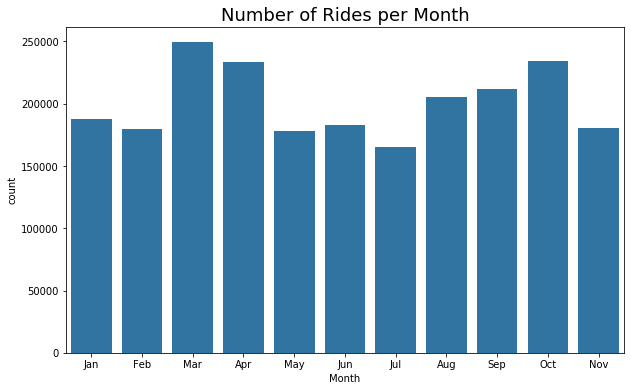

In [116]:
figure(figsize=(10, 6))


ax = sns.countplot(x = 'month', data = df_cleaned, color = base_color)
ax.set_title("Number of Rides per Month", fontsize = 18)
plt.xlabel('Month');



Spring has the most rides especially in March and April followed by October that has the third most popular rides. We can conclude that during spring break, we had the most rides.

#### 2. Number of Trips per Day of the Week

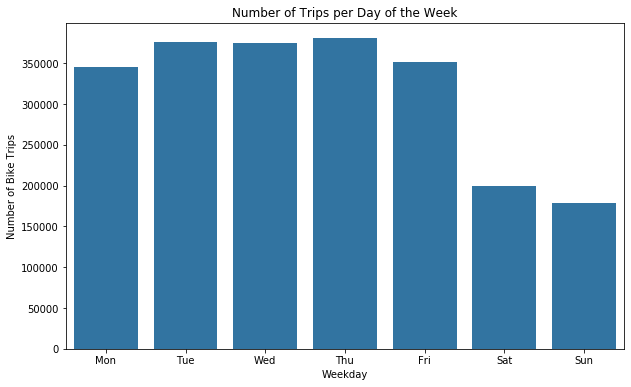

In [136]:
# Visualizing the total number of Trips per weekday
figure(figsize=(10, 6))


ax = sns.countplot(data = df_cleaned, x='weekday', color = base_color, order = weekday)

plt.xlabel('Weekday')
plt.ylabel('Number of Bike Trips')

ax.set_title('Number of Trips per Day of the Week');

Thursdays and Tuesdays are the most popular days for using bikes, however Wednesday, Mondays and Fridays are very close to Tues & Weds numbers. All of that suggests that Bike usage are more usable on the workdays than weekends.

#### 3. Number of Trips per Hour

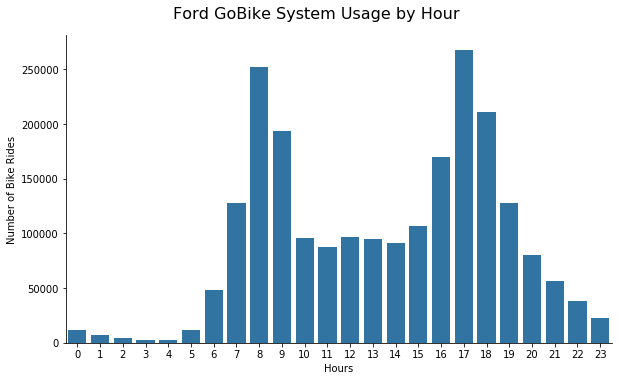

In [186]:
# Hourly usage of the Ford Go Bike System
ax = sns.catplot(data = df_cleaned, x = 'hour', kind='count', color = base_color, aspect = 1.7)

ax.set_axis_labels('Hours', 'Number of Bike Rides')

ax.fig.suptitle('Ford GoBike System Usage by Hour', y = 1.05, fontsize = 16);

The most usage of bikes were in thee morning between 7 - 9 AM in the morning and 16 - 19 which is a tpyical workingday in the US and that proves our previous findings that workdays have more usage than weekends.

#### 4. Trip Duration Distribution  

In [118]:
df_cleaned["duration"].describe(percentiles = [.98])["98%"]

39.0

In [119]:
df_cleaned["duration"].describe()["75%"]

14.0

In [120]:
df_cleaned["duration"].mean()

12.39174305069544

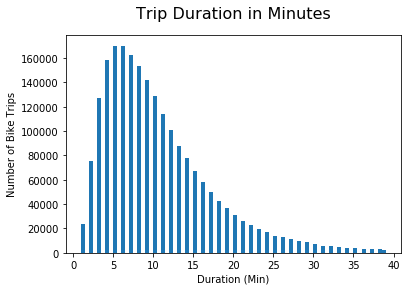

In [215]:
# Duration of the bike rides -in MINUTES
bin_edges = np.arange(1, 39 + 0.5, 0.5)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40]
labels = ['{}'.format(val) for val in ticks]

plt.hist(data = df_cleaned, x = 'duration', bins = bin_edges);

plt.title("Trip Duration in Minutes", y=1.05, fontsize=16)
plt.xlabel('Duration (Min)')
plt.ylabel('Number of Bike Trips');

The average trip is under 12.5 minutes, with 75% of trips being under 14 minutes. By Looking at the histogram, most rides fall in between the 3 - 12 minute range. We can conlcude from that riders are taking the bikes short distances.

### Bivariate Exploration

#### 5. The Visuals of Customers vs Subscribers

In [153]:
# Customers vs Subscribers
customer = df_cleaned.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_cleaned.query('user_type == "Subscriber"')['bike_id'].count()
customer_prop = customer / df_cleaned['bike_id'].count()
subscriber_prop = subscriber / df_cleaned['bike_id'].count()

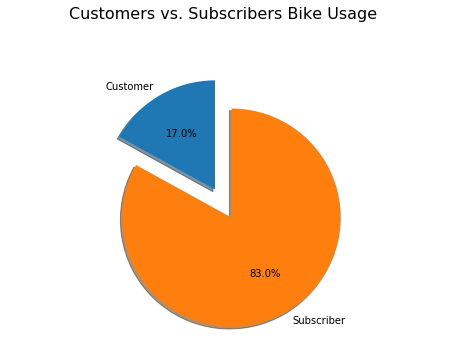

In [165]:
# The Visuals of Customers vs Subscribers
# pie chart
plt.figure(figsize = [8, 5])

labels = ['Customer', 'Subscriber']
size = [customer_prop, subscriber_prop]
explode = (0, 0.3)

plt.pie(size, explode=explode, labels = labels, autopct='%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')

plt.suptitle('Customers vs. Subscribers Bike Usage', y = 1.05, fontsize = 16);

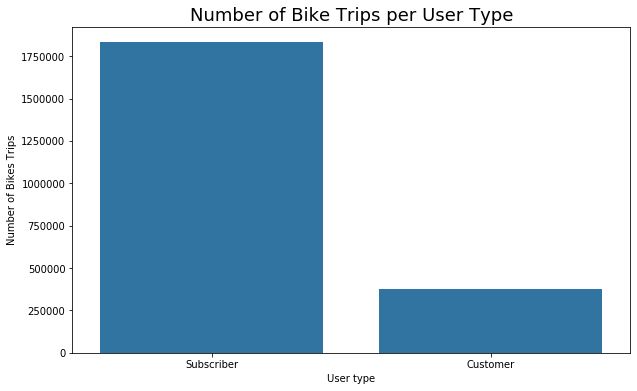

In [350]:
figure(figsize=(10, 6))

#Setting them in order
user_type_order = df_cleaned["user_type"].value_counts().index


ax = sns.countplot( df_cleaned["user_type"], color = base_color, order = user_type_order)
ax.set_title("Number of Bike Trips per User Type", fontsize = 18)
plt.xlabel('User type')
plt.ylabel('Number of Bikes Trips');


Subscribers' users had the most of bike usage with a percentage of 83%.

#### 6. Duration by user type

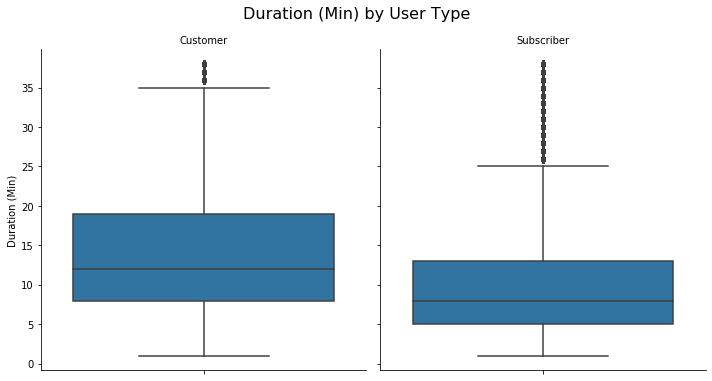

In [177]:
data = df_cleaned.query('duration < 39')

ax = sns.catplot(data = data, y = 'duration', col = "user_type", kind='box', color = base_color)

ax.set_titles(col_template = '{col_name}')
ax.set_axis_labels("", "Duration (Min)")
ax.fig.suptitle('Duration (Min) by User Type', y=1.05, fontsize=16);

The boxplot shows that customers use bikes for a longer time than subscribers.

#### 7. Number of Bike Trips for every user type per hour

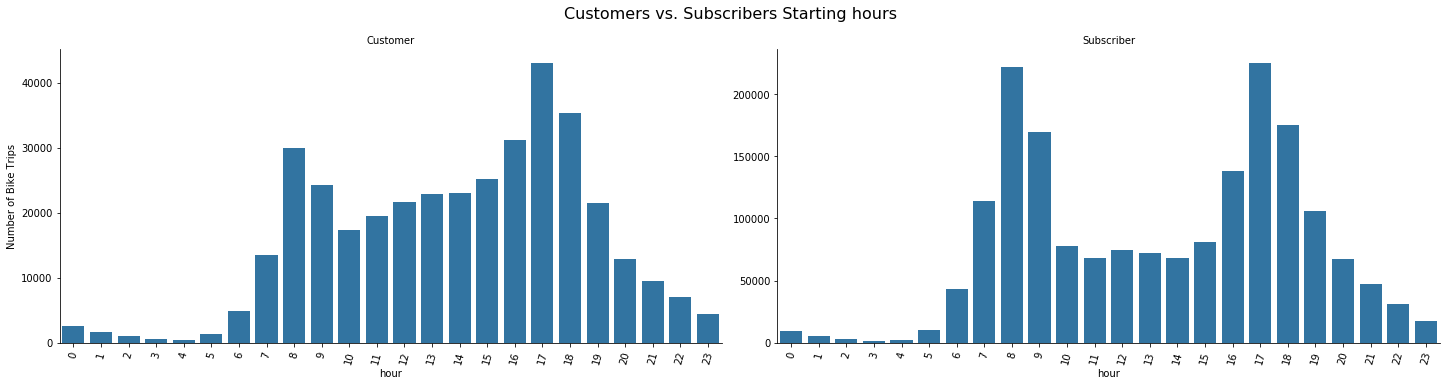

In [193]:
# Customer vs. Subscriber usage by duration
ax = sns.catplot(data = df_cleaned, x = 'hour', col='user_type', kind='count', sharey = False, color = base_color, aspect= 2);

ax.set_axis_labels('hour', 'Number of Bike Trips')
ax.set_titles('{col_name}')

ax.fig.suptitle('Customers vs. Subscribers Starting hours', y=1.05, fontsize=16);
ax.set_xticklabels(rotation=75);

Customers' favorite hour of riding is 17 and 18 followed by 8. On the other hand, subscribers' favorite hour is 17 and 8 followed by 9. Addtionally, customers seems to be actively using bikesin the afternoon than subscribers do.

### Multivariate Exploration

#### 8. The Average Trip Duration in Minutes per User Type

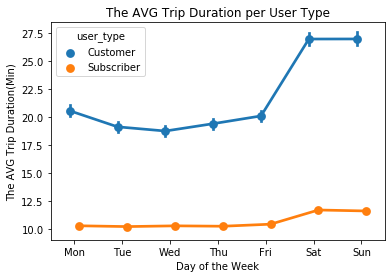

In [349]:
sns.pointplot(data = df_cleaned, x = 'weekday', y='duration', hue='user_type', dodge=0.2)
plt.title('The AVG Trip Duration per User Type')
plt.xlabel('Day of the Week')
plt.ylabel('The AVG Trip Duration(Min)');

This plot suggests that subscribers riders use bikes for a shorter period customers. For both users, the average duration is much higher during the weekends. Subscribers users usage of bikes are more efficient than customers. Customers might be using it for fun.

#### 9. Hourly Usage per Weekdays for Customers and Subscribers

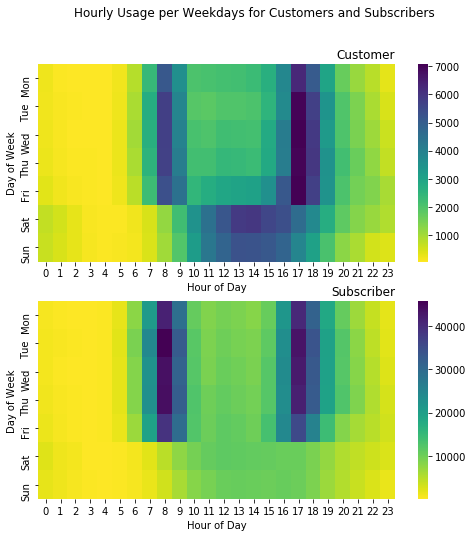

In [335]:
plt.subplots(figsize=(8,8))
plt.suptitle('Hourly Usage per Weekdays for Customers and Subscribers')

plt.subplot(2, 1, 1)
customers = df_cleaned.query('user_type == "Customer"')
cust_counts = customers.groupby(['weekday', 'hour']).size()
cust_counts = cust_counts.reset_index(name = 'count')
cust_counts = cust_counts.pivot(index='weekday', columns='hour', values='count')
sns.heatmap(cust_counts, cmap='viridis_r');
plt.title('Customer', loc='right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

plt.subplot(2, 1, 2)
subscribers = df_cleaned.query('user_type == "Subscriber"')
sub_counts = subscribers.groupby(['weekday', 'hour']).size()
sub_counts = sub_counts.reset_index(name='count')
sub_counts = sub_counts.pivot(index = 'weekday', columns='hour', values='count')
sns.heatmap(sub_counts, cmap='viridis_r');
plt.title('Subscriber', loc = 'right');
plt.xlabel('Hour of Day');
plt.ylabel('Day of Week');

The heatmaps show that subscribers use the system a lot on working days, Monday to Friday whereas customers ride a lot on weekends, especially in the afternoon between 11:00 AM to 16:00 PM. But on the working days they also use it in the morning customoers. Many trips are between 8:00 to 10:00 AM and 16:00 to 18:00 PM on working days. Therefore, we can conlude that custommers prefer weekend afternoons more than subscribers, however, subscribers uses more bikes in the weekdays in the morning and afternnoon, the reason might be for working or school. 

<b>Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?</b>

The Multivariate Exploration strengthened most of the patterns from my previous findings. The short period of bike usage are for subscribers that use it for a very short duration between Monday and Friday, which indicates to that bikes are used for work/study commute. On the other hand, plots are showing that customers have a very flexiable duration and also they use bikes more often on weekends, which suggests that they use for tours or lesisure.

<b>Were there any interesting or surprising interactions between features?</b>

Nothing was suprising to me but I guess this is because the data missed gender and age column which were available in the previous years but not in 2019.